<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Lectures/Lec12-Naive_bayes.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Naive Bayes
---

This is the lecture note for **Naive Bayes**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to Naive Bayes. I encourage you to read further about decision trees. </p>

Read more:
- [Naive Bayes spam filtering - wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering)
- [Naive Bayes classifier - wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Document_classification)
- [Naive Bayes spam - Towards Data Science](https://towardsdatascience.com/how-to-build-and-apply-naive-bayes-classification-for-spam-filtering-2b8d3308501)
- [Bernouill Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)
- [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
- [Complement Naive Bayes - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)
- [VotingClassifier - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
---


## Spam/ham classification

In [24]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

plt.style.use("seaborn-white")
df = pd.read_csv("Data/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns[2:]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
np.sum(df[df.columns[2:]].notna())

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [9]:
np.sum(df[df.columns[2:].tolist()].notna())

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [3]:
# check how many rows have values in the Unnamed columns
np.sum(df[df.columns[2:].tolist()].notna())

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [11]:
print(df.shape)
# read some of the Unnamed that have values
df.loc[df["Unnamed: 2"].notna()].iloc[:5]

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [26]:
# as it is very few rows, we remove those columns
df_no_NaN = df.dropna(axis=1)
df_no_NaN

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [27]:
df_no_NaN.columns = ["class", "content"]
df_no_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


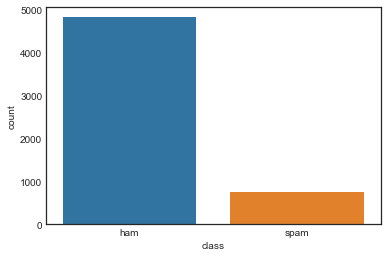

In [21]:
# check balance of spam/ham - this is an unbalanced dataset
sns.countplot(data = df_no_NaN, x = "class");

In [28]:
df_no_NaN

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
df = pd.get_dummies(df_no_NaN, columns = ["class"], drop_first=True)
df

,content,class_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [31]:
X, y = df["content"], df["class_spam"]
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: content, dtype: object

---
## TF-IDF vector

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [34]:
X_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
print(X_tfidf.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: content, Length: 5572, dtype: object

In [33]:
print(X_tfidf)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (5567, 5118)	0.2445888397614688
  (5567, 8202)	0.19074118816829963
  (5567, 2000)	0.185955090206136
  (5567, 5894)	0.19532744699307247
  (5567, 6062)	0.23098372602432177
  (5568, 2907)	0.6005703500933404
  (55

In [37]:
print(repr(X_tfidf))

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>


In [39]:
X_tfidf[0]

<5x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [40]:
print(X_tfidf[1])

  (0, 5369)	0.5465881710238072
  (0, 8134)	0.4316010362639011
  (0, 4192)	0.5236458071582338
  (0, 4385)	0.4082988561907181
  (0, 5343)	0.27211951321382544


In [41]:
print(f"Min value: {X_tfidf.min()}, max value: {X_tfidf.max()}")

Min value: 0.0, max value: 1.0


In [42]:

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

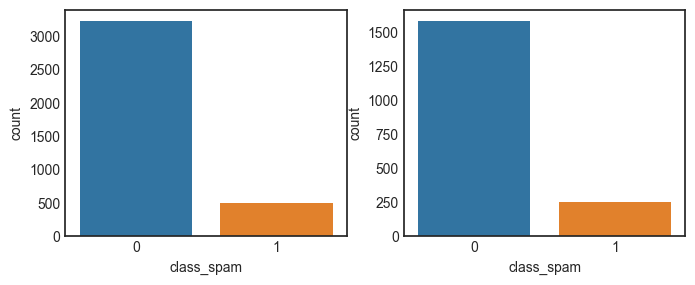

In [44]:
fig, ax = plt.subplots(1,2, dpi = 100, figsize = (8,3))
sns.countplot(x = y_train, ax = ax[0])
sns.countplot(x = y_test, ax = ax[1]);

---
## Naive Bayes

- family of probability classifiers based on Bayes theorem
- they have strong naive independent assumption between features 
- for text it means that the each word is assumed to be independent of other words (bag of words model)

For features $\vec{x} = (x_1,\ldots, x_n)$ and class $k$ the Bayes theorem gives: 
$$P(C_k|\vec{x}) \overbrace{=}^{Bayes} \frac{P(C_k)P(\vec{x}|C_k)}{P(\vec{x})} \overbrace{=}^{\text{conditional probability}} \frac{P(C_k, x_1, \ldots, x_n)}{P(\vec{x})}$$

Note first that $P(\vec{x})$ is the same value and we make an assumption that all features are mutually independent of each other. This assumption is naive as for words in a document, usually they are dependent on each other. 

$$P(C_k|x_1,\ldots, x_n) \propto P(C_k, x_1, \ldots, x_n) \propto P(C_k)P(x_1|C_k)P(x_2|C_k)\ldots P(x_n|C_k) \propto P(C_k)\prod_{i=1}^{n}P(x_i|C_k)$$

By combining this model with a maximum a posteriori (MAP) decision rule we get a classifier for $\hat{y} = C_k$: 
$$\hat{y} = \arg \max_{k\in\{1,\ldots,K\}} P(C_k)\prod_{i=1}^{n}P(x_i|C_k)$$

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



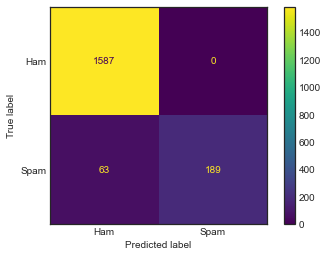

In [45]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

naive_bayes = dict(
    multinomial = MultinomialNB(),
    bernoulli = BernoulliNB(),
    complement = ComplementNB()
)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Ham", "Spam"]).plot()
    # Ham 0, Negative
    # Spam 1, Positive
    

evaluate_model(naive_bayes["multinomial"])

# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# high precision -> low FP -> low hams in spam box
# high recall -> low FN -> low spams in inbox
# want to have high precision as we don't want to have any hams in spam box
# can accept somewhat lower recall as it's not the end of the world if 
# we get spams in inbox. Ideally both precision and recall are high.

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



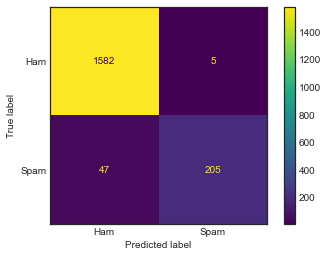

In [46]:
evaluate_model(naive_bayes["bernoulli"])

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1587
           1       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



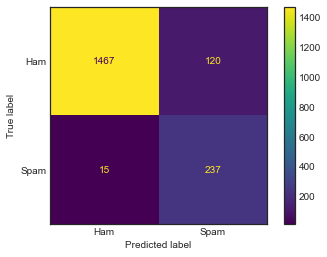

In [47]:
evaluate_model(naive_bayes["complement"])

---
## Trying other models

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



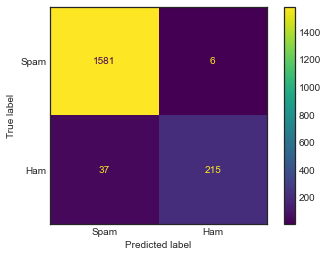

In [49]:
from sklearn.svm import LinearSVC

evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.99      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.98      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



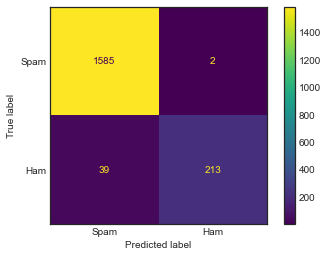

In [50]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

---
## Combining models 

- majority voting
- the class with most votes wins

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.85      0.92       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



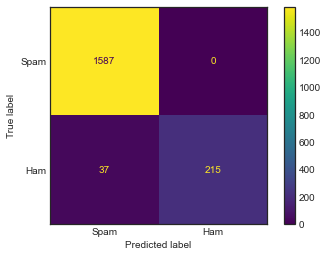

In [52]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(
    [("rf", RandomForestClassifier()),
     ("svc", LinearSVC()),
     ("naive_complement", ComplementNB()),
     ("naive_bernoulli", BernoulliNB()),
     ("naive_multinomail", MultinomialNB())], voting="hard")

evaluate_model(vote_clf)

# we see that a combination of models improves the performance

---
## Deployment

In [54]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

# fits on all data
pipe.fit(X, y)
pipe.predict(["Come and collect your $1000 Bitcoins!"])
# 0 is ham and 1 is spam

array([0], dtype=uint8)

In [59]:
print(pipe.predict(["Come and collect your $1000 Bitcoins!"]))

[0]


In [57]:
pipe.predict(["You will win, $1000 for free"])

array([1], dtype=uint8)

In [56]:
print(pipe.predict(["You will win, $1000 for free"]))

[1]


In [55]:
pipe.predict(["You get $500"])

array([1], dtype=uint8)

In [58]:
print(pipe.predict(["You get $500"]))

[1]
